The idea is that the functional form (the asymmetry) of a PSF is captured well by one calculation of PSF for a particular Ei.
In another words, we can use the same functional form, but adjust the energy scale to allow the functional form to be used for any Ei.
So here we just use the functional form we already obtained for Ei=130meV data, and try to get a good representation out of it.

# Preparation

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib notebook

# Model from Ei=130meV

In [4]:

from dgsres import icg
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)


In [5]:

import numpy as np
def linear(a0, a1):
    return lambda E: a0 + a1*E

def parabolic(a0, a1, a2):
    return lambda E: a0 + a1*E + a2*E*E

a0_a = 0.220735832594
a1_a = -0.0012356210013
a2_a = -4.86453189362e-06
a0_b = 0.0476677481103
a1_b = -0.000415707214915
a2_b = 1.92210604173e-07
from numpy import array
x_t0 = array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120., 130.])
y_t0 = array([   5.74030747,    6.17078063,    6.60218515,    7.19238872,
          7.91124324,    9.02569315,   10.53174808,   12.61032027,
         15.78117089,   21.19391277,   30.7701625 ,   56.60375125,  100. , 300      ])

x_sigma = array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120., 130.])
y_sigma = array([  2.56952213,   2.62595814,   2.74551247,   2.86743246,
         3.02381235,   3.16348315,   3.32458451,   3.65308239,
         3.84840911,   4.49697484,   5.80173869,   8.62287841,  20.  , 100    ])

def positive(f):
    def _(x):
        t = f(x)
        try:
            t[t<0] = 0
            return t
        except:
            if t<0: t = 0
            return t
    return _

interped_funcs = dict(
    a = positive(parabolic(a0_a, a1_a, a2_a)),
    b = positive(parabolic(a0_b, a1_b, a2_b)),
    t0 = lambda E: np.interp(E, x_t0, y_t0),
    sigma = lambda E: np.interp(E, x_sigma, y_sigma),
    R = lambda E: 0*E+ 0.3, 
)

<IPython.core.display.Javascript object>


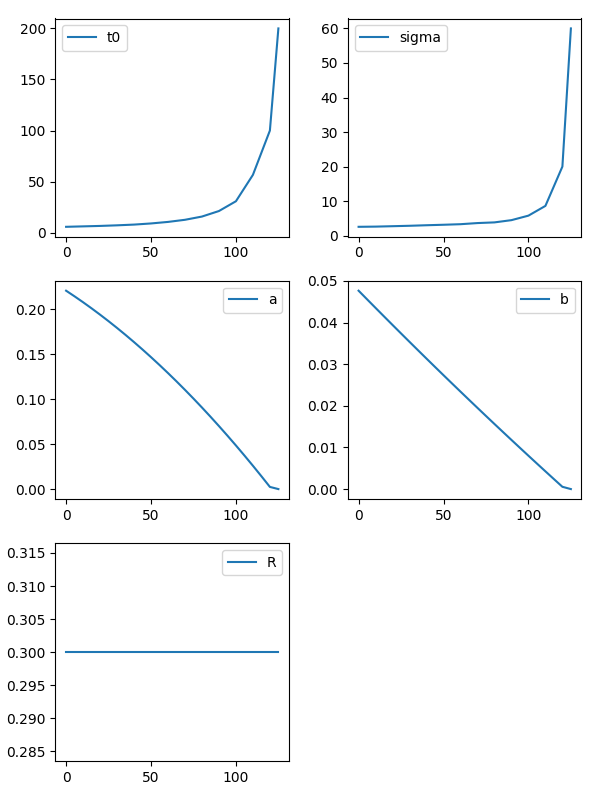

In [6]:
variables = 't0 sigma a b R'.split()
plt.figure(figsize=(6,8))

for i,v in enumerate(variables):
    plt.subplot(3, 2, i+1)
    x = np.arange(0, 130., 5.)
    y2 = interped_funcs[v](x)
    plt.plot(x, y2, label=v)
    plt.legend()
    continue

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


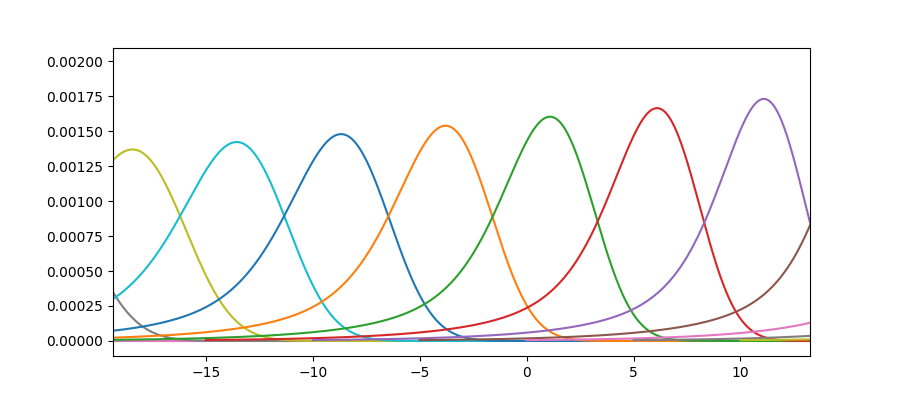

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:51: RuntimeWarning: overflow encountered in exp
  T1 = sigma*l/(l2+l3);  T2_a = np.exp(vmin_a**2 - umin**2)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:52: RuntimeWarning: invalid value encountered in multiply
  C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:53: RuntimeWarning: invalid value encountered in multiply
  C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a) - sqp*vmin_a * erfc(vmin_a))
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:54: RuntimeWarning: invalid value encountered in multiply
  C2_a = sq2 * T1**3 * T2_a * (sqp*(1./2+vmin_a**2)*erfc(vmin_a)-vmin_a*np.exp(-vmin_a**2))
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:31: RuntimeWarning: invalid value encountered in sqrt
  t = -l3/vf + l3/np.sqrt(vi**2-SE2V**2*E)
/SNS/software/miniconda2/envs/py2/

In [7]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-60., 130., 5.):
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    x = np.arange(E0-20, E0+20, .01)
    y = icg.resolution(x, Ei=130., E0=E0, geom=geom, **params)
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(x, y)
plt.show()

# Get FWHM. Fit so we can get an analytical form for FWHM vs E

we want to "remove" the FWHM value from the functional form

In [8]:
def fwhm(E0):
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    x = np.arange(E0-20, E0+20, .01)
    y = icg.resolution(x, Ei=130., E0=E0, geom=geom, **params)
    max = np.max(y)
    hmax = max/2
    top = y>hmax
    # print hmax
    # print top
    topx = x[top]
    return topx[-1]-topx[0]

In [9]:
Esamples = np.arange(-60, 105., 5)

In [11]:
fwhms = [fwhm(E) for E in Esamples]

<IPython.core.display.Javascript object>


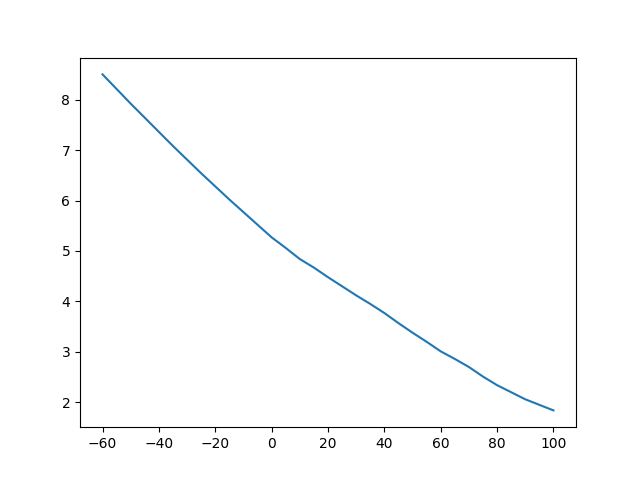

In [12]:
plt.figure()
plt.plot(Esamples, fwhms)

In [32]:
a

array([-3.25775146e-07,  1.25946371e-04, -4.47017439e-02,  5.32418042e+00])

<IPython.core.display.Javascript object>


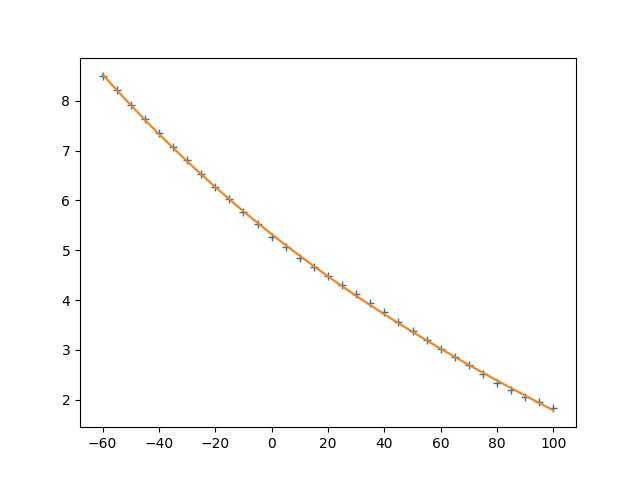

In [16]:
order = 3
a = np.polyfit(Esamples, fwhms, order)
x = Esamples
yfit = sum( a[i]*x**(order-i) for i in range(order+1) )

plt.figure()
plt.plot(x, fwhms, '+')
plt.plot(x, yfit)

In [17]:
# a, order
def interped_fwhm(x):
    return sum( a[i]*x**(order-i) for i in range(order+1) )

In [18]:
def psf(x, E_over_Ei, fwhm):
    Emax = 107. # over this value the resolution function using interpolated params got broader. 
    E0 = E_over_Ei*Emax
    params = dict()
    for name in interped_funcs.keys():
        params[name] = interped_funcs[name](E0)
    return icg.resolution(x/fwhm*interped_fwhm(E0)+E0, Ei=130., E0=E0, geom=geom, **params)

<IPython.core.display.Javascript object>


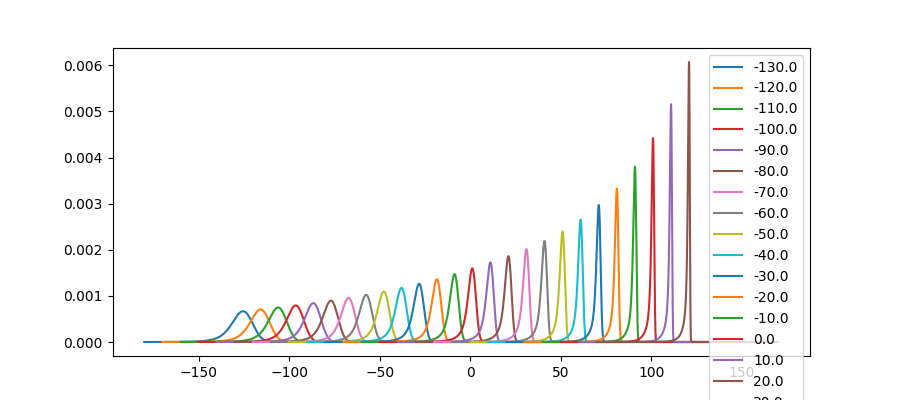

In [25]:
Ei = 130.
plt.figure(figsize=(9, 4))
x = np.arange(-50, +50, .01)
for E0 in np.arange(-130., 130., 10.):
    y = psf(x, E_over_Ei=E0/Ei, fwhm=interped_fwhm(E0))
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(E0+x, y, label=E0)
plt.show()
plt.legend()

<IPython.core.display.Javascript object>


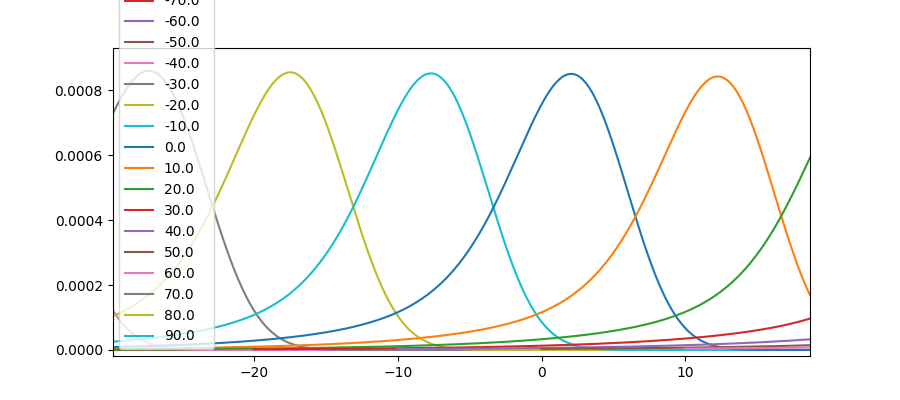

In [36]:
Ei = 100.
plt.figure(figsize=(9, 4))
x = np.arange(-50, +50, .01)
for E0 in np.arange(-Ei, Ei, Ei/10.):
    y = psf(x, E_over_Ei=E0/Ei, fwhm=10.)
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(E0+x, y, label=E0)
plt.show()
plt.legend()

<IPython.core.display.Javascript object>


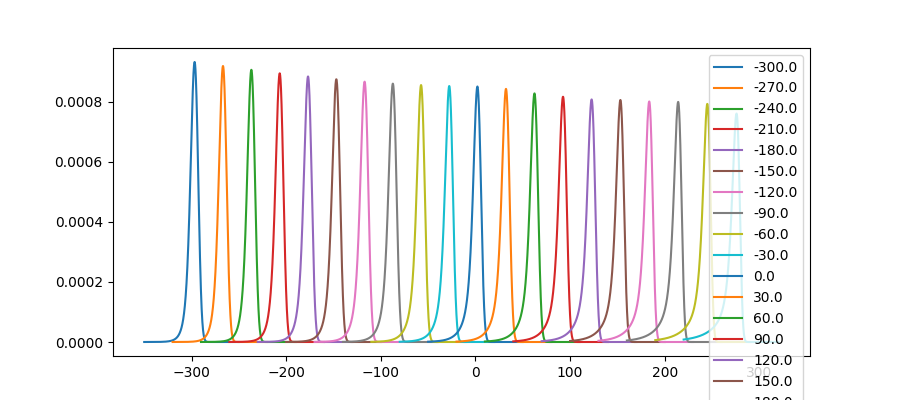

In [34]:
Ei = 300.
plt.figure(figsize=(9, 4))
x = np.arange(-50, +50, .01)
for E0 in np.arange(-300., 300., 30.):
    y = psf(x, E_over_Ei=E0/Ei, fwhm=10.)
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(E0+x, y, label=E0)
plt.show()
plt.legend()